In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("./data/sentiment labelled sentences/amazon_cells_labelled.txt"
                 , sep='\t', header=None)

In [12]:
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Goal: Identify "clusters" in the reviews. 

- Vectorize data.
- Reduce dimensionality.
- Clustering.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD # PCA's alternative for sparse arrays
from sklearn.cluster import KMeans

#### Vectorization

In [20]:
vec = TfidfVectorizer(stop_words='english')

In [21]:
X = df.iloc[:,0].values
X_vec = vec.fit_transform(X)

In [22]:
X_vec

<1000x1642 sparse matrix of type '<class 'numpy.float64'>'
	with 4702 stored elements in Compressed Sparse Row format>

#### Dimensionality reduction

In [25]:
svd = TruncatedSVD(n_components=100)
X_final = svd.fit_transform(X_vec)

#### Clustering

In [27]:
km = KMeans(n_clusters=5)
km.fit(X_final)

KMeans(n_clusters=5)

In [28]:
labels = km.predict(X_final)

In [34]:
df['label'] = labels

In [37]:
from matplotlib import colors
vals = sorted(df['label'].unique())
colors = ['black','blue','red','yellow','green']# list(colors.CSS4_COLORS)[0:len(vals)]

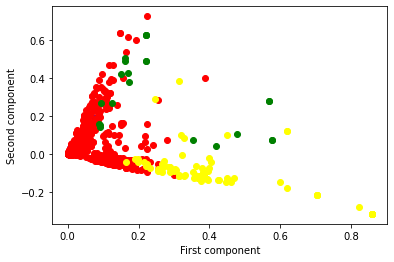

In [38]:
for i, color in enumerate(colors): #get index and value on the list (iterable)
    x1 = X_final[:,0][df['label'] == i]
    x2 = X_final[:,1][df['label'] == i]
    plt.scatter(x1,x2,c=color)
    plt.xlabel("First component")
    plt.ylabel("Second component")

In [39]:
df.groupby(['label']).count()

,0,1
label,,
0,16,16
1,14,14
2,869,869
3,79,79
4,22,22


In [42]:
df[df['label'] == 3].head(10)

,0,1,label
2,Great for the jawbone.,1,3
4,The mic is great.,1,3
10,And the sound quality is great.,1,3
18,Works great!.,1,3
25,Great Pocket PC / phone combination.,1,3
38,The case is great and works fine with the 680.,1,3
40,"It has a great camera thats 2MP, and the pics ...",1,3
57,I even dropped this phone into a stream and it...,1,3
68,Great for iPODs too.,1,3
69,This device is great in several situations:1.),1,3


In [43]:
df[df['label'] == 4].head(10)

,0,1,label
55,Everything about it is fine and reasonable for...,1,4
103,The price was very good and with the free ship...,1,4
136,Very good stuff for the price.,1,4
212,Great price also!,1,4
247,Nice headphones for the price and they work gr...,1,4
303,Good price.,1,4
320,I am also very happy with the price.,1,4
325,"good item, low price.",1,4
397,Great product and price.,1,4
402,Excellent product for the price.,1,4


**Hypothesis:** Cluster 4 is more concerned with price (uses more `price` in their reviews), whereas cluster 3 is more concerned with quality (uses more `great` in their reviews).

In [50]:
np.sum(df[df['label'] == 4][0].str.contains('price'))/df[df['label'] == 4].shape[0]

0.9545454545454546

In [52]:
np.sum(df[df['label'] == 4][0].str.contains('great'))/df[df['label'] == 4].shape[0]

0.09090909090909091

In [51]:
np.sum(df[df['label'] == 3][0].str.contains('great'))/df[df['label'] == 3].shape[0]

0.5569620253164557

In [53]:
np.sum(df[df['label'] == 3][0].str.contains('price'))/df[df['label'] == 3].shape[0]

0.0